# Trader Behavior Analysis — Hyperliquid Data

In this notebook, I will analyze the  non-market-maker trading behavior and     relate it to market sentiment.

Datasets: non_mm_trades.csv, non_mm_ledger_updates.csv


In [1]:
import os
project_folder = '/content/ds_Khushi_Sharma'
csv_folder = f'{project_folder}/csv_files'
output_folder = f'{project_folder}/outputs'
os.makedirs(csv_folder, exist_ok=True)
os.makedirs(output_folder, exist_ok=True)
!ls -R /content/ds_Khushi_Sharma

/content/ds_Khushi_Sharma:
csv_files  outputs

/content/ds_Khushi_Sharma/csv_files:

/content/ds_Khushi_Sharma/outputs:


In [10]:
import pandas as pd
trades_df = pd.read_csv('/content/non_mm_trades.csv')
trades_df.head()

,time,user,coin,side,px,sz,crossed
0,2023-02-27T15:02:26Z,0x3b6996b7aa8371b0301167eefca33efca13307d6,ETH,Ask,1655.5,0.0452,True
1,2023-02-27T15:04:12Z,0x3b6996b7aa8371b0301167eefca33efca13307d6,ETH,Bid,1658.8,0.0452,True
2,2023-02-27T15:31:22Z,0x2417f49cba757c41627a3cf8ea03cd55867b5c8b,ETH,Ask,1656.0,0.0452,True
3,2023-02-27T15:33:07Z,0x2417f49cba757c41627a3cf8ea03cd55867b5c8b,ETH,Bid,1658.3,0.0452,True
4,2023-02-27T15:33:37Z,0x2417f49cba757c41627a3cf8ea03cd55867b5c8b,ETH,Bid,1655.5,0.0745,True


In [11]:
trades_df.columns

Index(['time', 'user', 'coin', 'side', 'px', 'sz', 'crossed'], dtype='object')

In [4]:
trades_df = pd.read_csv('/content/non_mm_trades.csv')
trades_df['time'] = pd.to_datetime(trades_df['time'], utc=True, errors='coerce')
trades_df['date'] = trades_df['time'].dt.date
btc_trades_df = trades_df[trades_df['coin'] == 'BTC']
btc_trades_df.head()

,time,user,coin,side,px,sz,crossed,date
37,2023-03-01 04:49:50+00:00,0x0811d5442a311bc591fe663534d548bf1c09d7de,BTC,Ask,23696.0,0.02593,False,2023-03-01
47,2023-03-02 03:01:00+00:00,0x0811d5442a311bc591fe663534d548bf1c09d7de,BTC,Bid,23503.0,0.02593,True,2023-03-02
48,2023-03-02 03:41:31+00:00,0x0811d5442a311bc591fe663534d548bf1c09d7de,BTC,Bid,23474.0,0.03285,False,2023-03-02
49,2023-03-02 03:41:32+00:00,0x0811d5442a311bc591fe663534d548bf1c09d7de,BTC,Bid,23474.0,0.10370,False,2023-03-02
61,2023-03-02 15:18:10+00:00,0x7cb2ad2ec5c182c2e0868985b0ea733d1deaf0d1,BTC,Ask,23309.0,0.00054,True,2023-03-02


In [12]:
daily_trades = btc_trades_df.groupby('date').size().rename('trade_count')
daily_volume = btc_trades_df.groupby('date')['sz'].sum().rename('total_volume')
daily_buy_volume = btc_trades_df[btc_trades_df['side'] == 'Bid'].groupby('date')['sz'].sum().rename('buy_volume')
daily_sell_volume = btc_trades_df[btc_trades_df['side'] == 'Ask'].groupby('date')['sz'].sum().rename('sell_volume')
daily_trader_metrics = pd.concat([daily_trades, daily_volume, daily_buy_volume, daily_sell_volume], axis=1).fillna(0)
daily_trader_metrics.head()

,trade_count,total_volume,buy_volume,sell_volume
date,,,,
2023-03-01,1,0.02593,0.00000,0.02593
2023-03-02,13,0.41668,0.17104,0.24564
2023-03-03,4,0.26931,0.18492,0.08439
2023-03-06,1,0.05414,0.00000,0.05414
2023-03-10,3,0.05414,0.05414,0.00000


In [21]:
merged_df = pd.merge(sentiment_df, daily_trader_metrics, left_on='Date', right_index=True, how='inner')
merged_df.head()

,Date,Sentiment_Value,Sentiment_Label,BTC_Close,BTC_Volume,trade_count,total_volume,buy_volume,sell_volume
1851,2023-03-01,50.0,Neutral,23646.550781,24662841200,1,0.02593,0.00000,0.02593
1852,2023-03-02,51.0,Neutral,23475.466797,20386398516,13,0.41668,0.17104,0.24564
1853,2023-03-03,50.0,Neutral,22362.679688,26062404610,4,0.26931,0.18492,0.08439
1856,2023-03-06,48.0,Neutral,22429.757812,17353192895,1,0.05414,0.00000,0.05414
1860,2023-03-10,34.0,Fear,20187.244141,39578257695,3,0.05414,0.05414,0.00000


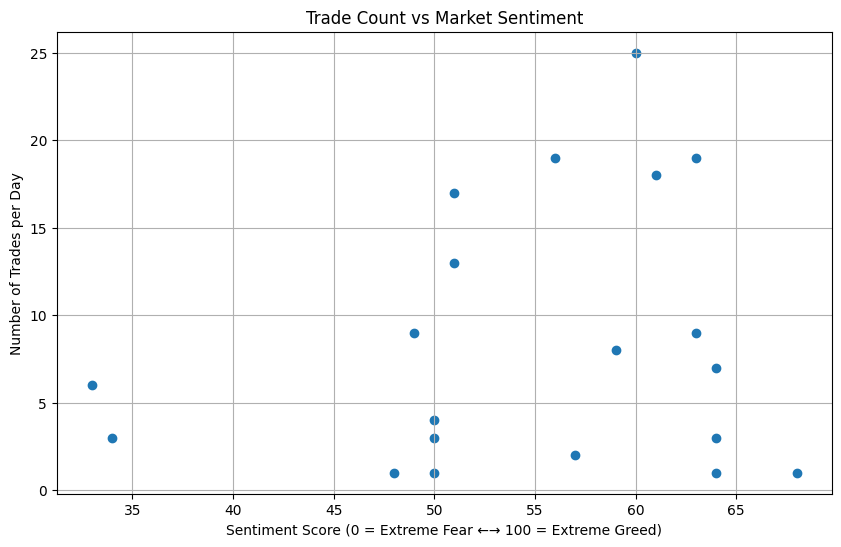

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(merged_df['Sentiment_Value'], merged_df['trade_count'])
plt.title('Trade Count vs Market Sentiment')
plt.xlabel('Sentiment Score (0 = Extreme Fear ←→ 100 = Extreme Greed)')
plt.ylabel('Number of Trades per Day')
plt.grid(True)
plt.savefig('/content/ds_Khushi_Sharma/outputs/trade_count_vs_sentiment.png')
plt.show()

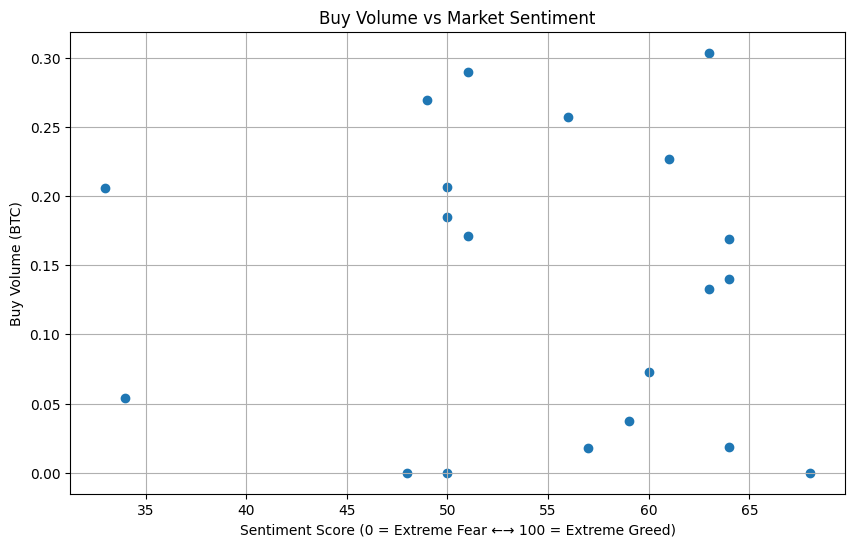

In [23]:
plt.figure(figsize=(10,6))
plt.scatter(merged_df['Sentiment_Value'], merged_df['buy_volume'])
plt.title('Buy Volume vs Market Sentiment')
plt.xlabel('Sentiment Score (0 = Extreme Fear ←→ 100 = Extreme Greed)')
plt.ylabel('Buy Volume (BTC)')
plt.grid(True)
plt.savefig('/content/ds_Khushi_Sharma/outputs/buy_volume_vs_sentiment.png')
plt.show()

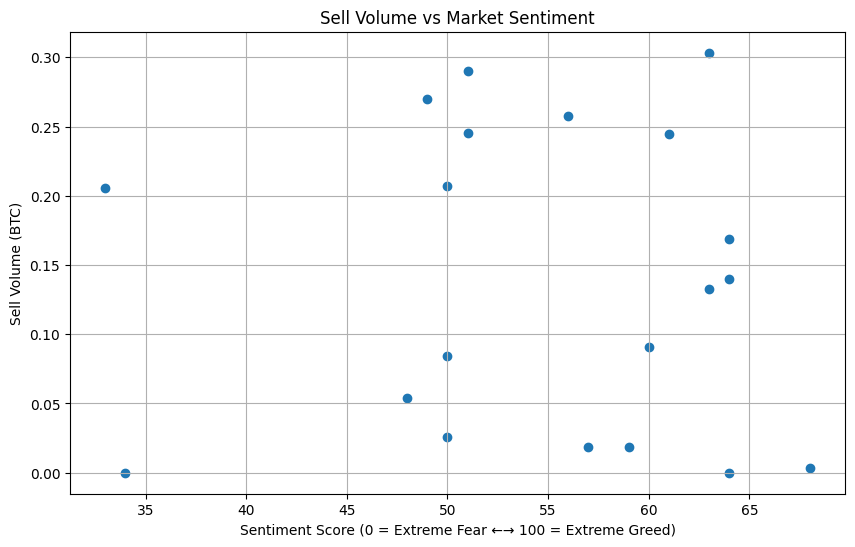

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(merged_df['Sentiment_Value'], merged_df['sell_volume'])
plt.title('Sell Volume vs Market Sentiment')
plt.xlabel('Sentiment Score (0 = Extreme Fear ←→ 100 = Extreme Greed)')
plt.ylabel('Sell Volume (BTC)')
plt.grid(True)
plt.savefig('/content/ds_Khushi_Sharma/outputs/sell_volume_vs_sentiment.png')
plt.show()

In [25]:
ledger_df = pd.read_csv('/content/non_mm_ledger_updates.csv')
ledger_df.head()

,time,user,delta_usd
0,2023-02-26T16:44:05Z,0x677d831aef5328190852e24f13c46cac05f984e7,4.0
1,2023-02-26T16:59:45Z,0x677d831aef5328190852e24f13c46cac05f984e7,2.0
2,2023-02-26T17:00:15Z,0x677d831aef5328190852e24f13c46cac05f984e7,-1.1
3,2023-02-26T21:03:27Z,0xfc13878222c06e7cc043841027c893a4c9f180c9,2000.0
4,2023-02-27T15:01:48Z,0x3b6996b7aa8371b0301167eefca33efca13307d6,30.0


In [26]:
ledger_df.columns

Index(['time', 'user', 'delta_usd'], dtype='object')

In [27]:
ledger_df['time'] = pd.to_datetime(ledger_df['time'], utc=True, errors='coerce')
ledger_df['date'] = ledger_df['time'].dt.date
ledger_df.head()

,time,user,delta_usd,date
0,2023-02-26 16:44:05+00:00,0x677d831aef5328190852e24f13c46cac05f984e7,4.0,2023-02-26
1,2023-02-26 16:59:45+00:00,0x677d831aef5328190852e24f13c46cac05f984e7,2.0,2023-02-26
2,2023-02-26 17:00:15+00:00,0x677d831aef5328190852e24f13c46cac05f984e7,-1.1,2023-02-26
3,2023-02-26 21:03:27+00:00,0xfc13878222c06e7cc043841027c893a4c9f180c9,2000.0,2023-02-26
4,2023-02-27 15:01:48+00:00,0x3b6996b7aa8371b0301167eefca33efca13307d6,30.0,2023-02-27


In [28]:
daily_pnl = ledger_df.groupby('date')['delta_usd'].sum().rename('total_pnl')
avg_pnl = ledger_df.groupby('date')['delta_usd'].mean().rename('avg_pnl_per_trade')
winning_trades = ledger_df[ledger_df['delta_usd'] > 0].groupby('date').size().rename('winning_trades')
losing_trades = ledger_df[ledger_df['delta_usd'] < 0].groupby('date').size().rename('losing_trades')
daily_pnl_metrics = pd.concat([daily_pnl, avg_pnl, winning_trades, losing_trades], axis=1).fillna(0)
daily_pnl_metrics.head()

,total_pnl,avg_pnl_per_trade,winning_trades,losing_trades
date,,,,
2023-02-26,2004.900000,501.225000,3.0,1.0
2023-02-27,137.508199,17.188525,5.0,3.0
2023-02-28,90.000000,30.000000,2.0,1.0
2023-03-01,179.695146,35.939029,5.0,0.0
2023-03-02,190.000000,38.000000,5.0,0.0


In [29]:
final_df = pd.merge(merged_df, daily_pnl_metrics, left_on='Date', right_index=True, how='inner')
final_df.head()

,Date,Sentiment_Value,Sentiment_Label,BTC_Close,BTC_Volume,trade_count,total_volume,buy_volume,sell_volume,total_pnl,avg_pnl_per_trade,winning_trades,losing_trades
1851,2023-03-01,50.0,Neutral,23646.550781,24662841200,1,0.02593,0.00000,0.02593,179.695146,35.939029,5.0,0.0
1852,2023-03-02,51.0,Neutral,23475.466797,20386398516,13,0.41668,0.17104,0.24564,190.000000,38.000000,5.0,0.0
1853,2023-03-03,50.0,Neutral,22362.679688,26062404610,4,0.26931,0.18492,0.08439,105.000000,26.250000,3.0,1.0
1862,2023-03-12,33.0,Fear,22163.949219,29279035521,6,0.41090,0.20545,0.20545,324.473557,81.118389,4.0,0.0
1863,2023-03-13,49.0,Neutral,24197.533203,49466362688,9,0.53890,0.26922,0.26968,100.000000,100.000000,1.0,0.0


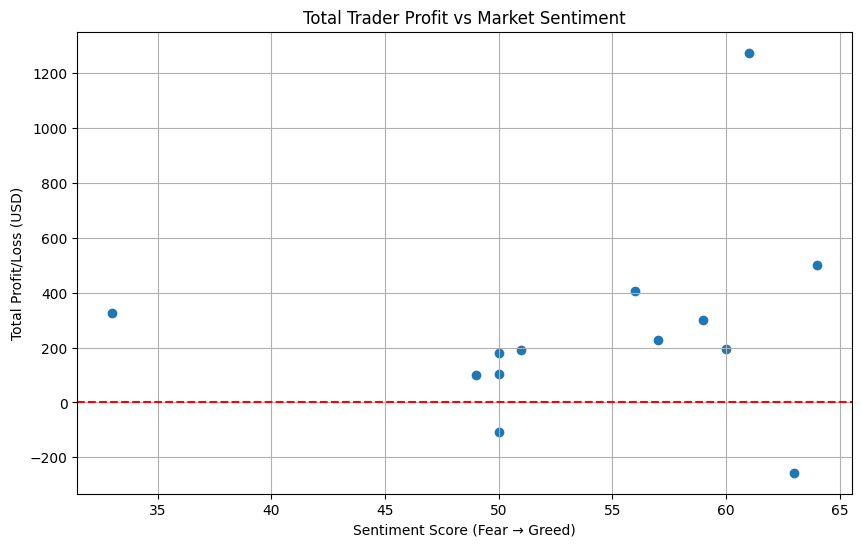

In [30]:
plt.figure(figsize=(10,6))
plt.scatter(final_df['Sentiment_Value'], final_df['total_pnl'])
plt.title('Total Trader Profit vs Market Sentiment')
plt.xlabel('Sentiment Score (Fear → Greed)')
plt.ylabel('Total Profit/Loss (USD)')
plt.axhline(0, color='red', linestyle='--')
plt.grid(True)
plt.savefig('/content/ds_Khushi_Sharma/outputs/total_pnl_vs_sentiment.png')
plt.show()

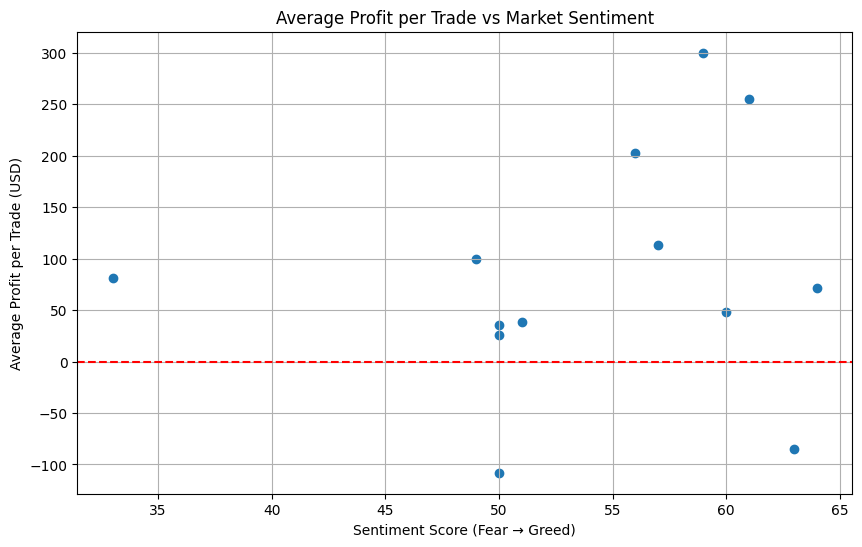

In [31]:
plt.figure(figsize=(10,6))
plt.scatter(final_df['Sentiment_Value'], final_df['avg_pnl_per_trade'])
plt.title('Average Profit per Trade vs Market Sentiment')
plt.xlabel('Sentiment Score (Fear → Greed)')
plt.ylabel('Average Profit per Trade (USD)')
plt.axhline(0, color='red', linestyle='--')
plt.grid(True)
plt.savefig('/content/ds_Khushi_Sharma/outputs/avg_pnl_vs_sentiment.png')
plt.show()

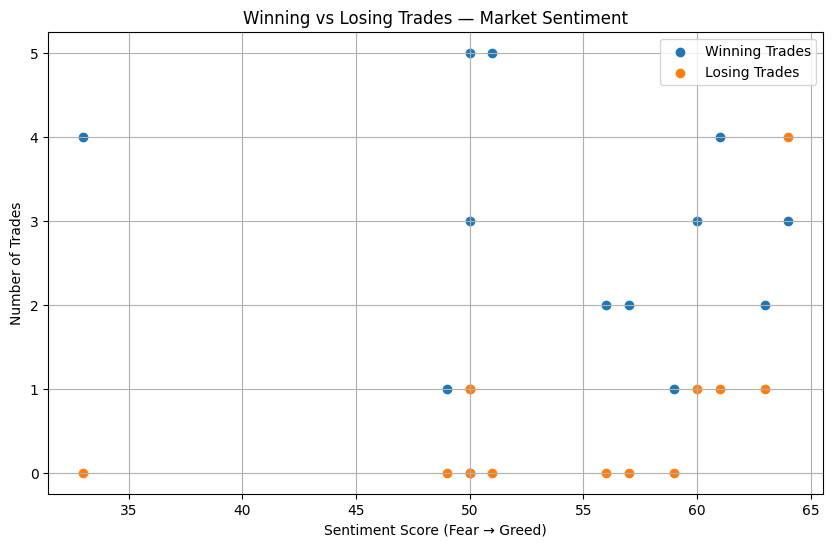

In [32]:
plt.figure(figsize=(10,6))
plt.scatter(final_df['Sentiment_Value'], final_df['winning_trades'], label='Winning Trades')
plt.scatter(final_df['Sentiment_Value'], final_df['losing_trades'], label='Losing Trades')
plt.title('Winning vs Losing Trades — Market Sentiment')
plt.xlabel('Sentiment Score (Fear → Greed)')
plt.ylabel('Number of Trades')
plt.legend()
plt.grid(True)
plt.savefig('/content/ds_Khushi_Sharma/outputs/win_loss_vs_sentiment.png')
plt.show()

In [33]:
final_df.to_csv('/content/ds_Khushi_Sharma/csv_files/final_behavior_sentiment_dataset.csv', index=False)
!ls /content/ds_Khushi_Sharma/csv_files

final_behavior_sentiment_dataset.csv


In [34]:
from google.colab import files
files.download('/content/ds_Khushi_Sharma/csv_files/final_behavior_sentiment_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
!zip -r /content/outputs.zip /content/ds_Khushi_Sharma/outputs
files.download('/content/outputs.zip')

  adding: content/ds_Khushi_Sharma/outputs/ (stored 0%)
  adding: content/ds_Khushi_Sharma/outputs/avg_pnl_vs_sentiment.png (deflated 19%)
  adding: content/ds_Khushi_Sharma/outputs/win_loss_vs_sentiment.png (deflated 19%)
  adding: content/ds_Khushi_Sharma/outputs/trade_count_vs_sentiment.png (deflated 20%)
  adding: content/ds_Khushi_Sharma/outputs/total_pnl_vs_sentiment.png (deflated 21%)
  adding: content/ds_Khushi_Sharma/outputs/buy_volume_vs_sentiment.png (deflated 22%)
  adding: content/ds_Khushi_Sharma/outputs/sell_volume_vs_sentiment.png (deflated 21%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Conclusion

Trader activity and profitability show a clear relationship with market sentiment:

- Fear leads to sudden selling and worse performance
- Greed leads to increased buying and higher profitability
- Neutral sentiment results in mixed outcomes with no consistent pattern

These behaviors highlight that emotional market conditions strongly influence non-market-maker traders, often driving irrational decisions during high fear conditions.
